<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: generate reinforcement algorithm plots

import matplotlib.pyplot as plt

def plot_rewards(rewards, title="Training Rewards"):
    """Plots the rewards obtained during reinforcement learning training.

    Args:
        rewards: A list of rewards obtained at each episode.
        title: The title of the plot.
    """
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title(title)
    plt.grid(True)
    plt.show()


def plot_multiple_rewards(rewards_list, labels, title="Comparison of Training Rewards"):
  """Plots multiple reward curves on a single graph.

    Args:
      rewards_list: A list of lists, where each inner list contains rewards for one run.
      labels: A list of strings, representing labels for each reward curve.
      title: The title for the plot.
  """
  for i, rewards in enumerate(rewards_list):
    plt.plot(rewards, label=labels[i])

  plt.xlabel("Episode")
  plt.ylabel("Reward")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()


def plot_steps_per_episode(steps_per_episode, title="Steps per Episode"):
  """Plots the number of steps taken per episode during training.

    Args:
      steps_per_episode: A list containing the number of steps for each episode.
      title: Title of the plot.
  """
  plt.plot(steps_per_episode)
  plt.xlabel('Episode')
  plt.ylabel('Steps')
  plt.title(title)
  plt.grid(True)
  plt.show()


# Example usage (assuming you have rewards data from your training):
# rewards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# plot_rewards(rewards)

# Example for multiple reward plots
# rewards1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# rewards2 = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
# plot_multiple_rewards([rewards1, rewards2], ["Algorithm 1", "Algorithm 2"])

# Example for steps per episode
# steps = [10, 20, 15, 25, 30]
# plot_steps_per_episode(steps)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


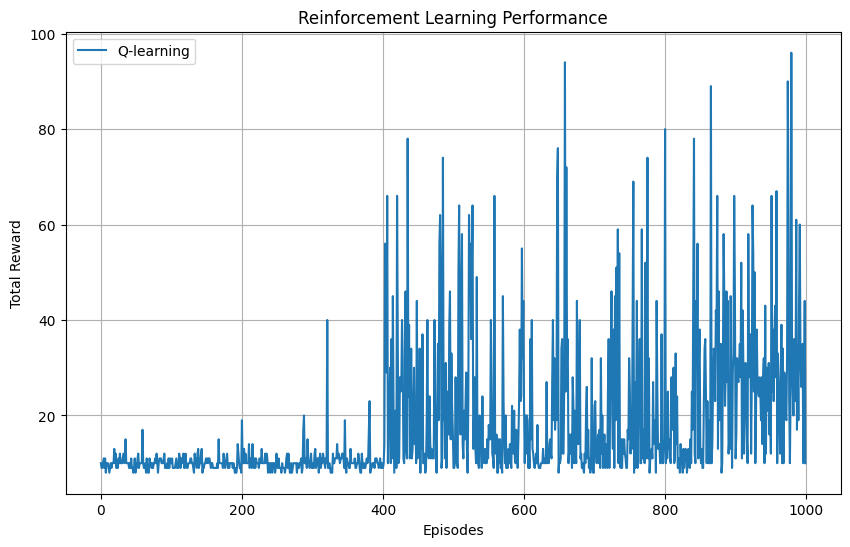

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Choose an environment
env = gym.make("CartPole-v1")

# Define algorithms and their parameters
algorithms = {
    "Q-learning": {
        "alpha": 0.1,
        "gamma": 0.99,
        "epsilon": 0.1,
        "episodes": 1000,
    },
    # Add other algorithms (e.g., SARSA, Deep Q-Network) and parameters
}

# Function to discretize the state space
def discretize_state(state, num_bins):
    """Discretizes the continuous state space into discrete bins.

    Args:
        state: The continuous state observation.
        num_bins: The number of bins for each state variable.

    Returns:
        A tuple representing the discretized state.
    """
    state_bins = [
        np.linspace(env.observation_space.low[i], env.observation_space.high[i], num_bins[i] + 1)[1:-1]
        for i in range(len(env.observation_space.low))
    ]
    discretized_state = [np.digitize(state[i], state_bins[i]) for i in range(len(state))]
    return tuple(discretized_state)

# Function to train an agent using Q-learning
def q_learning(alpha, gamma, epsilon, episodes):
    num_bins = (10, 10, 10, 10)  # Number of bins for each state variable
    # Calculate the total number of discrete states
    num_states = np.prod(num_bins)
    q_table = np.zeros([num_states, env.action_space.n])
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        discretized_state = discretize_state(state, num_bins)
        total_reward = 0
        done = False
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                # Use the discretized state to access the Q-table
                state_index = np.ravel_multi_index(discretized_state, num_bins)
                action = np.argmax(q_table[state_index])  # Exploit learned values

            next_state, reward, done, _ = env.step(action)
            next_discretized_state = discretize_state(next_state, num_bins)

            # Update the Q-table using the discretized states
            state_index = np.ravel_multi_index(discretized_state, num_bins)
            next_state_index = np.ravel_multi_index(next_discretized_state, num_bins)
            q_table[state_index, action] = q_table[state_index, action] + alpha * (
                    reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action]
            )

            total_reward += reward
            discretized_state = next_discretized_state  # Update the current state

        rewards.append(total_reward)
    return rewards

# Train agents using different algorithms
results = {}
for algo_name, params in algorithms.items():
    if algo_name == "Q-learning":
        results[algo_name] = q_learning(**params)
    # Add training for other algorithms

# Plot the results
plt.figure(figsize=(10, 6))
for algo_name, rewards in results.items():
    plt.plot(rewards, label=algo_name)

plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reinforcement Learning Performance")
plt.legend()
plt.grid(True)
plt.show()

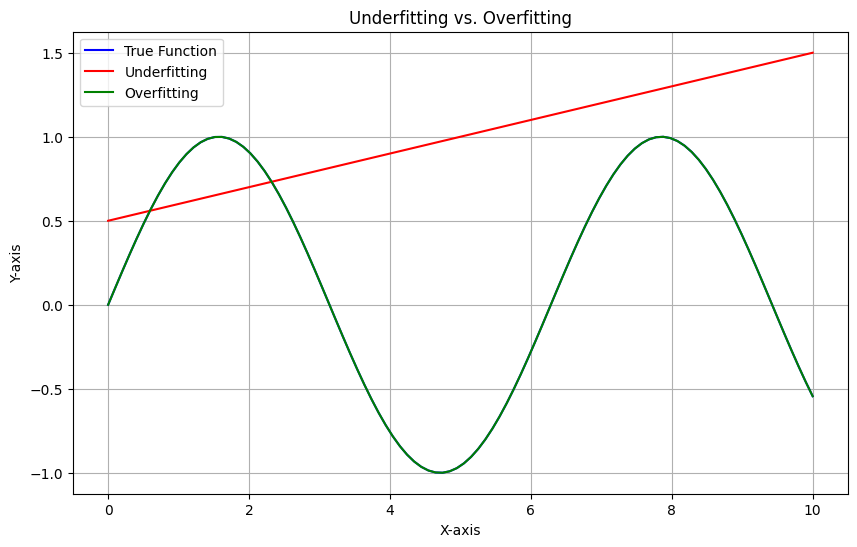

In [4]:
# prompt: generate python code for underfitting and overfitting plots

import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for underfitting and overfitting
# Replace this with your actual model training data
x = np.linspace(0, 10, 100)
y_true = np.sin(x)  # True function (ground truth)

# Underfitting (low complexity model)
y_underfit = 0.1 * x + 0.5  # Linear model

# Overfitting (high complexity model)
coefficients = np.polyfit(x, y_true, 15)  # High degree polynomial
y_overfit = np.polyval(coefficients, x)


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="True Function", color='blue')
plt.plot(x, y_underfit, label="Underfitting", color='red')
plt.plot(x, y_overfit, label="Overfitting", color='green')


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Underfitting vs. Overfitting")
plt.legend()
plt.grid(True)
plt.show()

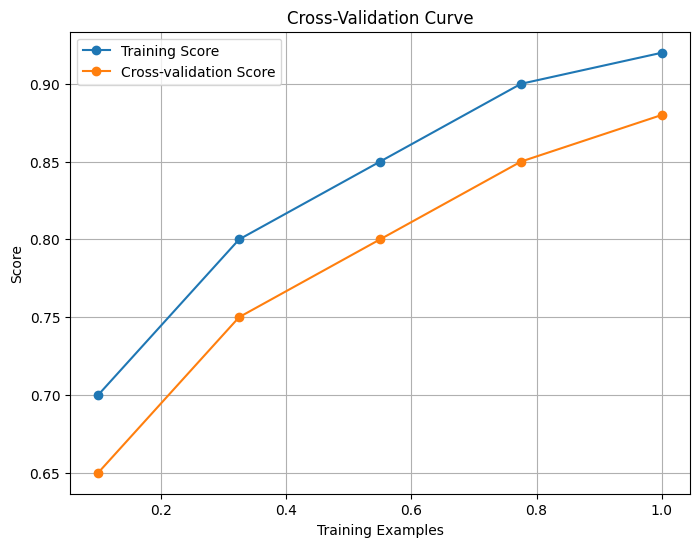

In [5]:
# prompt: develop python code for cross validation plot grapgh for that

import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for cross-validation (replace with your actual data)
train_sizes = np.linspace(0.1, 1.0, 5)  # Example training set sizes
train_scores = [0.7, 0.8, 0.85, 0.9, 0.92]  # Example training scores
test_scores = [0.65, 0.75, 0.8, 0.85, 0.88]  # Example test scores

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores, label="Cross-validation Score", marker='o')

plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Cross-Validation Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import random

# Gridworld setup
GRID_SIZE = 3
GOAL_STATE = (2, 2)
PIT_STATE = (1, 1)
START_STATE = (0, 0)

# Parameters
ACTIONS = ['up', 'down', 'left', 'right']
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.2  # Exploration rate
EPISODES = 1000

# Rewards
REWARDS = np.full((GRID_SIZE, GRID_SIZE), -1)  # Default step cost
REWARDS[GOAL_STATE] = 10
REWARDS[PIT_STATE] = -10

# Q-Table
Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Helper functions
def get_next_state(state, action):
    x, y = state
    if action == 'up' and x > 0:
        return (x - 1, y)
    elif action == 'down' and x < GRID_SIZE - 1:
        return (x + 1, y)
    elif action == 'left' and y > 0:
        return (x, y - 1)
    elif action == 'right' and y < GRID_SIZE - 1:
        return (x, y + 1)
    return state  # No movement if action is invalid

def choose_action(state):
    if random.uniform(0, 1) < EPSILON:  # Exploration
        return random.choice(ACTIONS)
    else:  # Exploitation
        x, y = state
        return ACTIONS[np.argmax(Q[x, y])]

def is_terminal_state(state):
    return state == GOAL_STATE or state == PIT_STATE

# Q-Learning algorithm
for episode in range(EPISODES):
    state = START_STATE
    while not is_terminal_state(state):
        # Choose action
        action = choose_action(state)
        next_state = get_next_state(state, action)

        # Get reward
        reward = REWARDS[next_state]

        # Update Q-value
        x, y = state
        next_x, next_y = next_state
        action_index = ACTIONS.index(action)
        best_next_action = np.max(Q[next_x, next_y])
        Q[x, y, action_index] += ALPHA * (reward + GAMMA * best_next_action - Q[x, y, action_index])

        # Transition to next state
        state = next_state

# Display learned Q-values
print("Learned Q-Table:")
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print(f"State ({i}, {j}): {Q[i, j]}")

# Extract optimal policy
policy = np.full((GRID_SIZE, GRID_SIZE), '', dtype=object)
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) == GOAL_STATE:
            policy[i, j] = 'Goal'
        elif (i, j) == PIT_STATE:
            policy[i, j] = 'Pit'
        else:
            best_action = np.argmax(Q[i, j])
            policy[i, j] = ACTIONS[best_action]

print("\nOptimal Policy:")
print(policy)


Learned Q-Table:
State (0, 0): [3.11195968 3.73688327 3.10136828 4.58      ]
State (0, 1): [ 4.55450963 -9.95825442  3.11339923  6.2       ]
State (0, 2): [6.18666799 8.         4.57312197 6.1887817 ]
State (1, 0): [-8.22194787e-01  5.80987517e+00  6.39563254e-05 -5.69532790e+00]
State (1, 1): [0. 0. 0. 0.]
State (1, 2): [ 6.15924014 10.         -9.95825442  7.948136  ]
State (2, 0): [0.38402585 0.78938167 1.28757187 7.87662344]
State (2, 1): [-2.71        1.36361392  2.02069599  9.97534965]
State (2, 2): [0. 0. 0. 0.]

Optimal Policy:
[['right' 'right' 'down']
 ['down' 'Pit' 'down']
 ['right' 'right' 'Goal']]
